In [78]:

import matplotlib.pyplot as plt
import pickle as pkl
from torch import Tensor
import torch
import numpy as np
from annotations import get_annotations, has_class
import load_path
import os
import math
from matplotlib.ticker import NullFormatter
from matplotlib.patches import Rectangle
import detect.detectors as det

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
BM_D_NO_DS_PATH = '../tmp/bm-d-no-ds'
BM_D_NO_DS_PKL_FILES = os.listdir(BM_D_NO_DS_PATH) 

BM_ANT_NO_DS_PATH = '../tmp/bm-ant-no-ds'
BM_ANT_NO_DS_PKL_FILES = os.listdir(BM_ANT_NO_DS_PATH) 

In [80]:
f_plot = BM_D_NO_DS_PKL_FILES[4]
with open(f'{BM_D_NO_DS_PATH}/{f_plot}', 'rb') as file:
    S1, S2 = pkl.load(file)
anns = get_annotations(f_plot[:-4], 0, 1e6, 'D')
print(anns)

[{'class': 'D', 't_start': 321.864, 't_end': 325.732, 'f_start': 27.6, 'f_end': 71.5, 'overlap': 1.0, 'duration': 3.868000000000052, 'freq_range': 43.9}, {'class': 'D', 't_start': 329.5, 't_end': 332.692, 'f_start': 28.0, 'f_end': 68.7, 'overlap': 1.0, 'duration': 3.1920000000000073, 'freq_range': 40.7}, {'class': 'D', 't_start': 342.524, 't_end': 344.252, 'f_start': 32.0, 'f_end': 69.4, 'overlap': 1.0, 'duration': 1.7280000000000086, 'freq_range': 37.400000000000006}, {'class': 'D', 't_start': 356.596, 't_end': 359.788, 'f_start': 35.9, 'f_end': 81.7, 'overlap': 1.0, 'duration': 3.1920000000000073, 'freq_range': 45.800000000000004}, {'class': 'D', 't_start': 643.152, 't_end': 647.496, 'f_start': 15.9, 'f_end': 80.0, 'overlap': 1.0, 'duration': 4.343999999999937, 'freq_range': 64.1}, {'class': 'D', 't_start': 661.376, 't_end': 663.628, 'f_start': 39.6, 'f_end': 71.5, 'overlap': 1.0, 'duration': 2.2520000000000664, 'freq_range': 31.9}, {'class': 'D', 't_start': 683.036, 't_end': 685.756

In [81]:
def s1_to_img(S1, fs=250):
    X = []
    f = []
    for _lambda in sorted(S1.keys()):
        X.append(S1[_lambda][:, None])
        f.append(_lambda / np.pi / 2 * fs)
    X = torch.concat(X, dim=1).numpy().T
    return np.arange(X.shape[1]) / fs, f, X

def plot_s(S1, file, t1, dur, fs=250):
    t, f, x = s1_to_img(S1, fs)
    
    n1 = math.floor(fs * t1)
    n2 = n1 + math.ceil(fs * dur)
    T, F = np.meshgrid(t[n1:n2], f)
    
    fig, ax = plt.subplots(2, 1)
    ax1 = ax[0]
    ax2 = ax[1]
    
    ax1.pcolor(T, F, np.log(x[:, n1:n2]))
    ax1.set_yscale('log')
    ax1.get_yaxis().set_major_formatter(NullFormatter())
    ax1.get_yaxis().set_minor_formatter(NullFormatter())
    ax1.set_yticks(f[::2])
    ax1.set_yticklabels([f'{fi:.1f}' for fi in f[::2]])
    
    anns = get_annotations(file, t1 - 50, t1+dur+50)
    for ann in anns:
        tst, te, fst, fe = ann['t_start'], ann['t_end'], ann['f_start'], ann['f_end']
        r = Rectangle((tst, fst), ann['duration'], ann['freq_range'], linewidth=1, edgecolor='r', facecolor='none')
        ax1.add_patch(r)
        
    return x[:, n1:n2]   
    
        
    
    

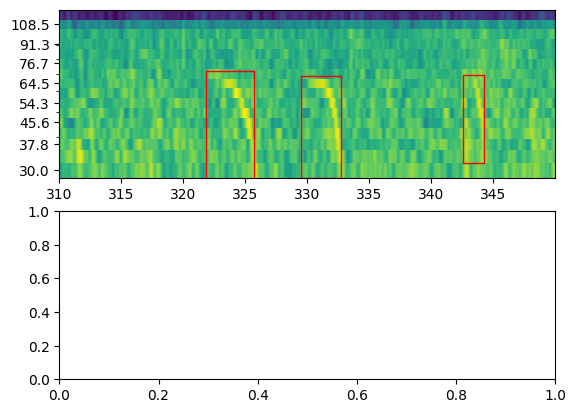

In [82]:
x = plot_s(S1, f_plot[:-4], 310, 40)



In [84]:
h = det.proposed_detector(0, 16, 3, 5, 800, f_dim=1, t_dim=0)
h.apply(torch.from_numpy(x))

AttributeError: 'torch.return_types.median' object has no attribute 'narrow'